Import

In [ ]:
import pandas as pd
import sklearn as sl
from sklearn.model_selection import train_test_split,cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statistics import mean

Get Data, Preprocessing(normalize), splitting

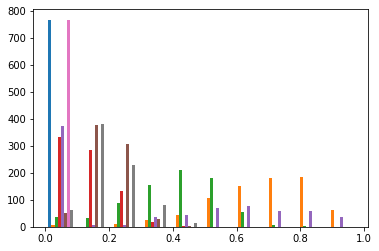

In [ ]:
data = pd.read_csv('pima-indians-diabetes.csv').values
inputs= data[:,0:8]
output = data [:,8]

normalize_x = preprocessing.normalize(inputs)

plt.hist(normalize_x)
plt.show()

trainX, testX, trainY, testY =train_test_split(normalize_x, output, test_size=0.33)


Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()

logisticRegr.fit(trainX,trainY)

predictionslgr= logisticRegr.predict(testX)

cmlgr=confusion_matrix(testY,predictionslgr)

print('LOGISTIC REGRESSION')

print('Confusion Matrix')
print (pd.DataFrame(cmlgr))
print()
print('precision = ', precision_score(testY,predictionslgr))
print('recall = ', recall_score(testY,predictionslgr))
print('F1-score = ',f1_score(testY,predictionslgr))
print('accuracy = ', accuracy_score(testY, predictionslgr))

print()

LOGISTIC REGRESSION
Confusion Matrix
     0  1
0  158  6
1   84  6

precision =  0.5
recall =  0.06666666666666667
F1-score =  0.11764705882352941
accuracy =  0.6456692913385826



L1 (lasso)

In [ ]:
print('L1')
print('determining l1 lambda')
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 

  
# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    lassoModel = Lasso(alpha = i * 0.25,tol = 0.0925) 
    lassoModel.fit(trainX, trainY) 
    scores = cross_val_score(lassoModel,inputs, output, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

chosenLambda = (np.argmax(cross_val_scores_lasso)+1)*0.25
print()
print('chosen lambda: ',chosenLambda)

lassoModelChosen = Lasso(alpha=chosenLambda,tol = 0.0925)
lassoModelChosen.fit(trainX,trainY)
predictionsl1 = lassoModelChosen.predict(testX)


for i in range(len(predictionsl1)):
    if(predictionsl1[i]>=0.5):
        predictionsl1[i]=1
    else:
        predictionsl1[i]=0

cml1= confusion_matrix(testY, predictionsl1)

print('Confusion Matrix')
print (pd.DataFrame(cml1))
print()
print('precision = ', precision_score(testY,predictionsl1))
print('recall = ', recall_score(testY,predictionsl1))
print('F1-score = ',f1_score(testY,predictionsl1))
print('accuracy = ', accuracy_score(testY, predictionsl1))


print()

L1
determining l1 lambda
0.25 : 23.192737943814652
0.5 : 21.05722328093963
0.75 : 18.401768266825766
1.0 : 18.222306444774127
1.25 : 18.00103376499665
1.5 : 17.723323051420866
1.75 : 17.38917430404678
2.0 : 16.998587522874352

chosen lambda:  0.25
Confusion Matrix
     0  1
0  164  0
1   90  0

precision =  0.0
recall =  0.0
F1-score =  0.0
accuracy =  0.6456692913385826



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


L2 (Ridge)

In [ ]:
print('L2')
print('determining l2 alpha')
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 
  
# List to maintain the different values of alpha 
alpha = [] 
  
# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
    ridgeModel = Ridge(alpha = i * 0.25) 
    ridgeModel.fit(trainX, trainY) 
    scores = cross_val_score(ridgeModel, inputs, output, cv = 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score) 
    alpha.append(i * 0.25) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 

chosenAlpha=(np.argmax(cross_val_scores_ridge)+1)*0.25
print()
print('chosen alpha: ',chosenAlpha)

ridgeModelChosen = Ridge(alpha=chosenAlpha)
ridgeModelChosen.fit(trainX,trainY)
predictionsl2 = ridgeModelChosen.predict(testX)
for i in range(len(predictionsl2)):
    if(predictionsl2[i]>=0.5):
        predictionsl2[i]=1
    else:
        predictionsl2[i]=0
cml2= confusion_matrix(testY,predictionsl2)

print('Confusion Matrix')
print (pd.DataFrame(cml2))
print()
print('precision = ', precision_score(testY,predictionsl2))
print('recall = ', recall_score(testY,predictionsl2))
print('F1-score = ',f1_score(testY,predictionsl2))
print('accuracy = ', accuracy_score(testY, predictionsl2))


print()

L2
determining l2 alpha
0.25 : 26.144676045207653
0.5 : 26.145812780168555
0.75 : 26.146914467652504
1.0 : 26.147981762583882
1.25 : 26.149015306707028
1.5 : 26.150015728886483
1.75 : 26.150983645399386
2.0 : 26.15191966022029

chosen alpha:  2.0
Confusion Matrix
     0  1
0  156  8
1   81  9

precision =  0.5294117647058824
recall =  0.1
F1-score =  0.16822429906542058
accuracy =  0.6496062992125984




> accuracy

*   logistic : 0.6456692913385826
*   l1 : 0.6456692913385826
*   l2 : 0.6496062992125984

there is a significant increase of accuracy with l2 however not much with l1





















l1 have a problem with classifying it all as false this leads to.

*   precision = 0.0
*   recall = 0.0
*   F1-score = 0.0




